In [2]:
#Importing Libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Loading Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda skill_list:  ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list)


Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\dylan\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Thu May 15 15:56:52 2025).


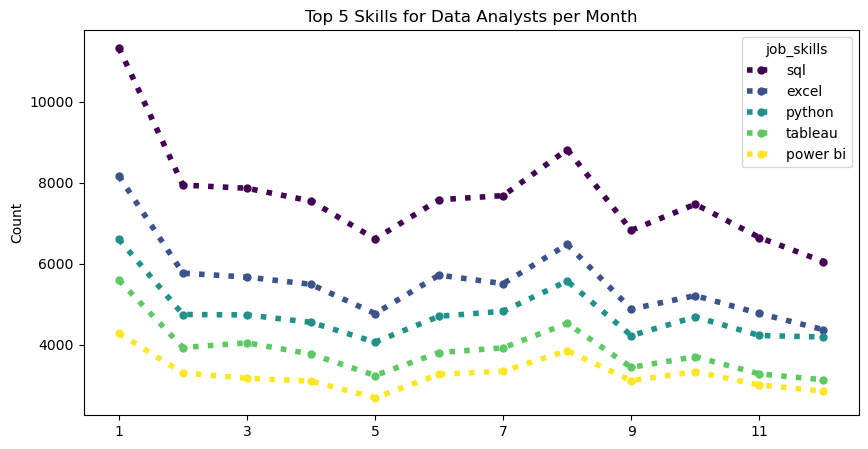

In [3]:
df_da = df[df['job_title_short']=='Data Analyst'].copy()
df_da['job_posted_month'] = df_da['job_posted_date'].dt.month

df_da_explode = df_da.explode('job_skills')
df_da_pivot = df_da_explode.pivot_table(
    index = 'job_posted_month', 
    columns='job_skills', 
    aggfunc='size', 
    fill_value=0
)
df_da_pivot.loc['Total']=df_da_pivot.sum()
df_da_pivot=df_da_pivot[df_da_pivot.loc['Total'].sort_values(ascending=False).index]
df_da_pivot=df_da_pivot.drop('Total')
df_da_pivot.iloc[:,:5].plot(
    kind='line', 
    linewidth = 4, 
    linestyle = ':', #options: -, --, -., :
    colormap = 'viridis', #options:  'viridis', 'plasma', 'inferno', 'magma', 'cividis'
    markersize = 5, 
    marker = 'o', #options:  'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    figsize=(10, 5)
    )
    
plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [4]:
df = df[df['job_title_short']=='Data Analyst']

df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'), 
    median_salary = ('salary_year_avg', 'median')
)
skill_count = 20
skill_stats=skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)



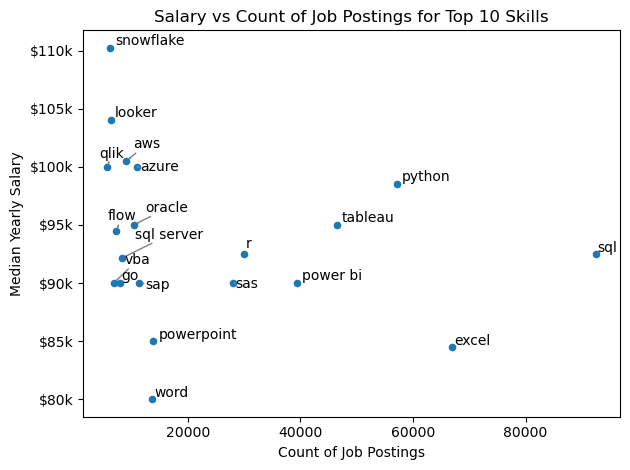

In [14]:


from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
texts=[]


for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt ))
    

adjust_text(texts, arrowprops = dict(arrowstyle = "->", color = "gray", lw=1))

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:  f'${int(y/1000)}k'))


plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs Count of Job Postings for Top 10 Skills')
plt.tight_layout()



plt.show()